# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

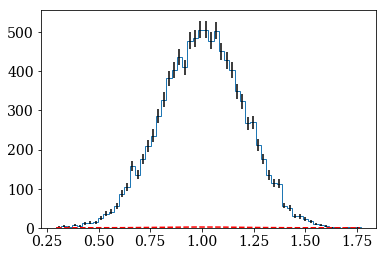

In [2]:
dist = norm(loc=1.0,scale=0.2)
draws = dist.rvs(10000)
_ = fancyhist(draws,histtype='step',bins='freedman',)
y = _[0]
edge = _[1]
center = 0.5*(edge[1:]+edge[:-1])
err = np.sqrt(y)
_ = plt.bar(center,y,width=0,yerr=err)
u = np.linspace(draws.min(),draws.max(),1000)
_ = plt.plot(u,dist.pdf(u),'r--')

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment.

[-2366.6307961  -2364.21280087 -1495.97133398 ...  1063.22265495
  1505.10263592  2697.89351622]


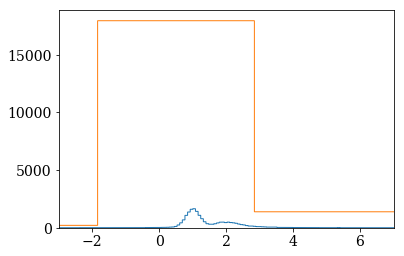

In [3]:
dist2 = cauchy(loc=2.0,scale=0.5)
draws2 = dist2.rvs(10000)
full = np.concatenate((draws,draws2),axis=0)
draws2.sort()
print(draws2)
_ = fancyhist(full,histtype='step',bins='freedman')
_2 = fancyhist(full,histtype='step',bins='scott')
_ = plt.xlim(-3,7)
_2 = plt.xlim(-3,7)

The Freedman-Diaconis plot maintains a regular double-peaked form across multiple sets of draws. The Scott plot has an irregular form that shifts with each set of draws, sometimes with one large bin spanning the central region and sometimes with two smaller bins. The Freedman-Diaconis plot is much shorter when unnormalized because it has many more bins than the Scott plot, and therefore has fewer elements per bin. The Freedman Diaconis gives a much more accurate and precise understanding of the distribution because the smaller bins are more resistant to random draws shifting values.

## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

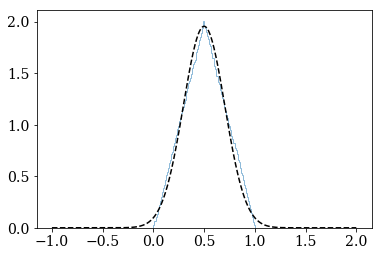

In [4]:
N=2

y = []
for i in np.arange(1000000):
    draws = np.random.random(N)
    y.append(np.average(draws))

_ = fancyhist(y,bins=100,histtype='step', alpha=0.5, density=True)

u = np.linspace(-1,2,1000)
dist = norm(loc=0.5,scale=1/np.sqrt(12)/np.sqrt(N))
_ = plt.plot(u,dist.pdf(u),'k--')

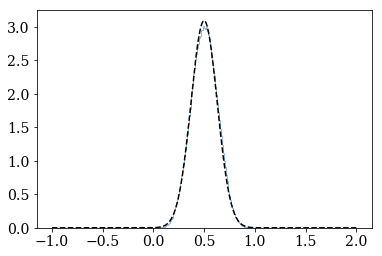

In [37]:
N=5

y = []
for i in np.arange(1000000):
    draws = np.random.random(N)
    y.append(np.average(draws))

_ = fancyhist(y,bins=100,histtype='step', alpha=0.5, density=True)

u = np.linspace(-1,2,1000)
dist = norm(loc=0.5,scale=1/np.sqrt(12)/np.sqrt(N))
_ = plt.plot(u,dist.pdf(u),'k--')